# <center>MY FACEBOOK POSTING HABITS</center>

Hello, I am **Karl Djotchuang Tamo**, a Datascience enthusiast.

In this notebook, we'll analyze my Facebook posts data. The aim is to answer two questions:<br />

**1. How often do I post on Facebook?**<br />
**2. Am I using Facebook more or less than I used to?**

This analysis was inspired by a post by [**DataQuest's Charlie Custer**](https://www.dataquest.io/blog/analyze-facebook-data-python/). Here's a link to the analysis he made:

We will analyze the data using pandas and then create a visualization to elicit the findings (bar chart) using seaborn and matplotlib at the end.

Our Facebook usage data is available on Facebook for free, all one needs do is to request for it. Here, we downloaded data related to posts only (in JSON format). You can get your own FB usage data [here](https://www.facebook.com/dyi/?referrer=yfi_settings)

## Step 1: Import and Format the Data

In [35]:
import pandas as pd

In [36]:
# create a dataframe of the data using the JSON file
df = pd.read_json('./posts/your_posts_1.json')

df.head()

,timestamp,data,title,tags,attachments
0,2015-01-14 11:55:35,[],Karl Djotchuang Tamo updated his status.,NaN,NaN
1,2015-01-14 15:58:08,[],Karl Djotchuang Tamo updated his status.,NaN,NaN
2,2015-01-14 16:00:21,[],Karl Djotchuang Tamo updated his status.,NaN,NaN
3,2015-01-14 16:09:05,[],Karl Djotchuang Tamo updated his status.,NaN,NaN
4,2015-01-14 19:24:22,[],Karl Djotchuang Tamo updated his status.,NaN,NaN


In [37]:
df.tail()

,timestamp,data,title,tags,attachments
154,2021-01-24 12:07:18,[{'post': 'I identify with this message strong...,NaN,NaN,[]
155,2021-02-07 20:40:03,[{'post': '#i_have_accepted_jesus_christ_as_my...,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...
156,2021-03-21 18:20:10,[{'post': 'Do you use your skills in Church? ...,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...
157,2021-07-02 21:34:56,[{'post': 'Our amazing team at Tyne Networks a...,NaN,"[Chriss Tyne, Constant Sonhana Fopa, Nkome Cha...",[{'data': [{'media': {'uri': 'photos_and_video...
158,2021-07-05 18:19:57,[],NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...


It appears the structure for storing data in the _'data'_ and _'title'_ columns have change from when I made my first post in 2015 till date.

Our 'data' column has data which is still in the JSON format. To answer our questions in this analysis, we don't need to deal with the actual post content, or with other information like attached media files. We're just concerned with how I have made new posts.

Next, we'll rename the 'timestamp' column to 'post date' and convert it to a datetime object. We will also rename the 'data' column to 'post content' to give it some context. Finally, we will drop some of the unnecessary columns such as (title, attachments, and tags) just to have smaller and clearer data to work with.

In [38]:
df.tail()

,timestamp,data,title,tags,attachments
154,2021-01-24 12:07:18,[{'post': 'I identify with this message strong...,NaN,NaN,[]
155,2021-02-07 20:40:03,[{'post': '#i_have_accepted_jesus_christ_as_my...,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...
156,2021-03-21 18:20:10,[{'post': 'Do you use your skills in Church? ...,NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...
157,2021-07-02 21:34:56,[{'post': 'Our amazing team at Tyne Networks a...,NaN,"[Chriss Tyne, Constant Sonhana Fopa, Nkome Cha...",[{'data': [{'media': {'uri': 'photos_and_video...
158,2021-07-05 18:19:57,[],NaN,NaN,[{'data': [{'media': {'uri': 'photos_and_video...


In [39]:
# rename the timestamp column
df.rename(columns={'timestamp': 'post date', 'data': 'post content'}, inplace=True)

#drop some unnecessary columns
df = df.drop(['title', 'attachments', 'tags'], axis=1)

# convert timestamp data to a datetime object
pd.to_datetime(df['post date'])

df.head()

,post date,post content
0,2015-01-14 11:55:35,[]
1,2015-01-14 15:58:08,[]
2,2015-01-14 16:00:21,[]
3,2015-01-14 16:09:05,[]
4,2015-01-14 19:24:22,[]


We have only the necessary columns now and the data looks cleaner. The rows of post content data that are empty (presented as []) are either posts which I had deleted, or those which only had pictures or posts without any text(caption). The pictures are linked in the 'attachments' column which we have already deleted

## Step 2: Obtaining Monthly Post Counts

Given that we're spanning years of history here, grouping our 'post date' column by months, and counting how many rows (i.e., posts) are associated with each month looks to be the best approach.

This means we need to do two things here:

- Set the post date column as the index of our dataframe.
- Resample the data by month, counting how many posts occur in each month.

In [105]:
# Setting the post date column as index
df = df.set_index('post date')

# Obtaining the counts per month
post_counts = df['post content'].resample('MS').size()
post_counts

post date
2015-01-01    17
2015-02-01    12
2015-03-01     4
2015-04-01     1
2015-05-01     1
              ..
2021-03-01     1
2021-04-01     0
2021-05-01     0
2021-06-01     0
2021-07-01     2
Freq: MS, Name: post content, Length: 79, dtype: int64

In [102]:
post_counts.sort_values(ascending=False)

post date
2016-06-01    20
2015-01-01    17
2015-02-01    12
2016-09-01    10
2015-07-01     6
              ..
2017-03-01     0
2017-02-01     0
2020-03-01     0
2020-04-01     0
2018-04-01     0
Name: post content, Length: 79, dtype: int64

## Step 3: Visualizing Our Findings

In [48]:
%%capture

!pip install seaborn

In [99]:
post_counts.index[np.arange(0, len(post_counts.index), step=12)]

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', name='post date', freq=None)

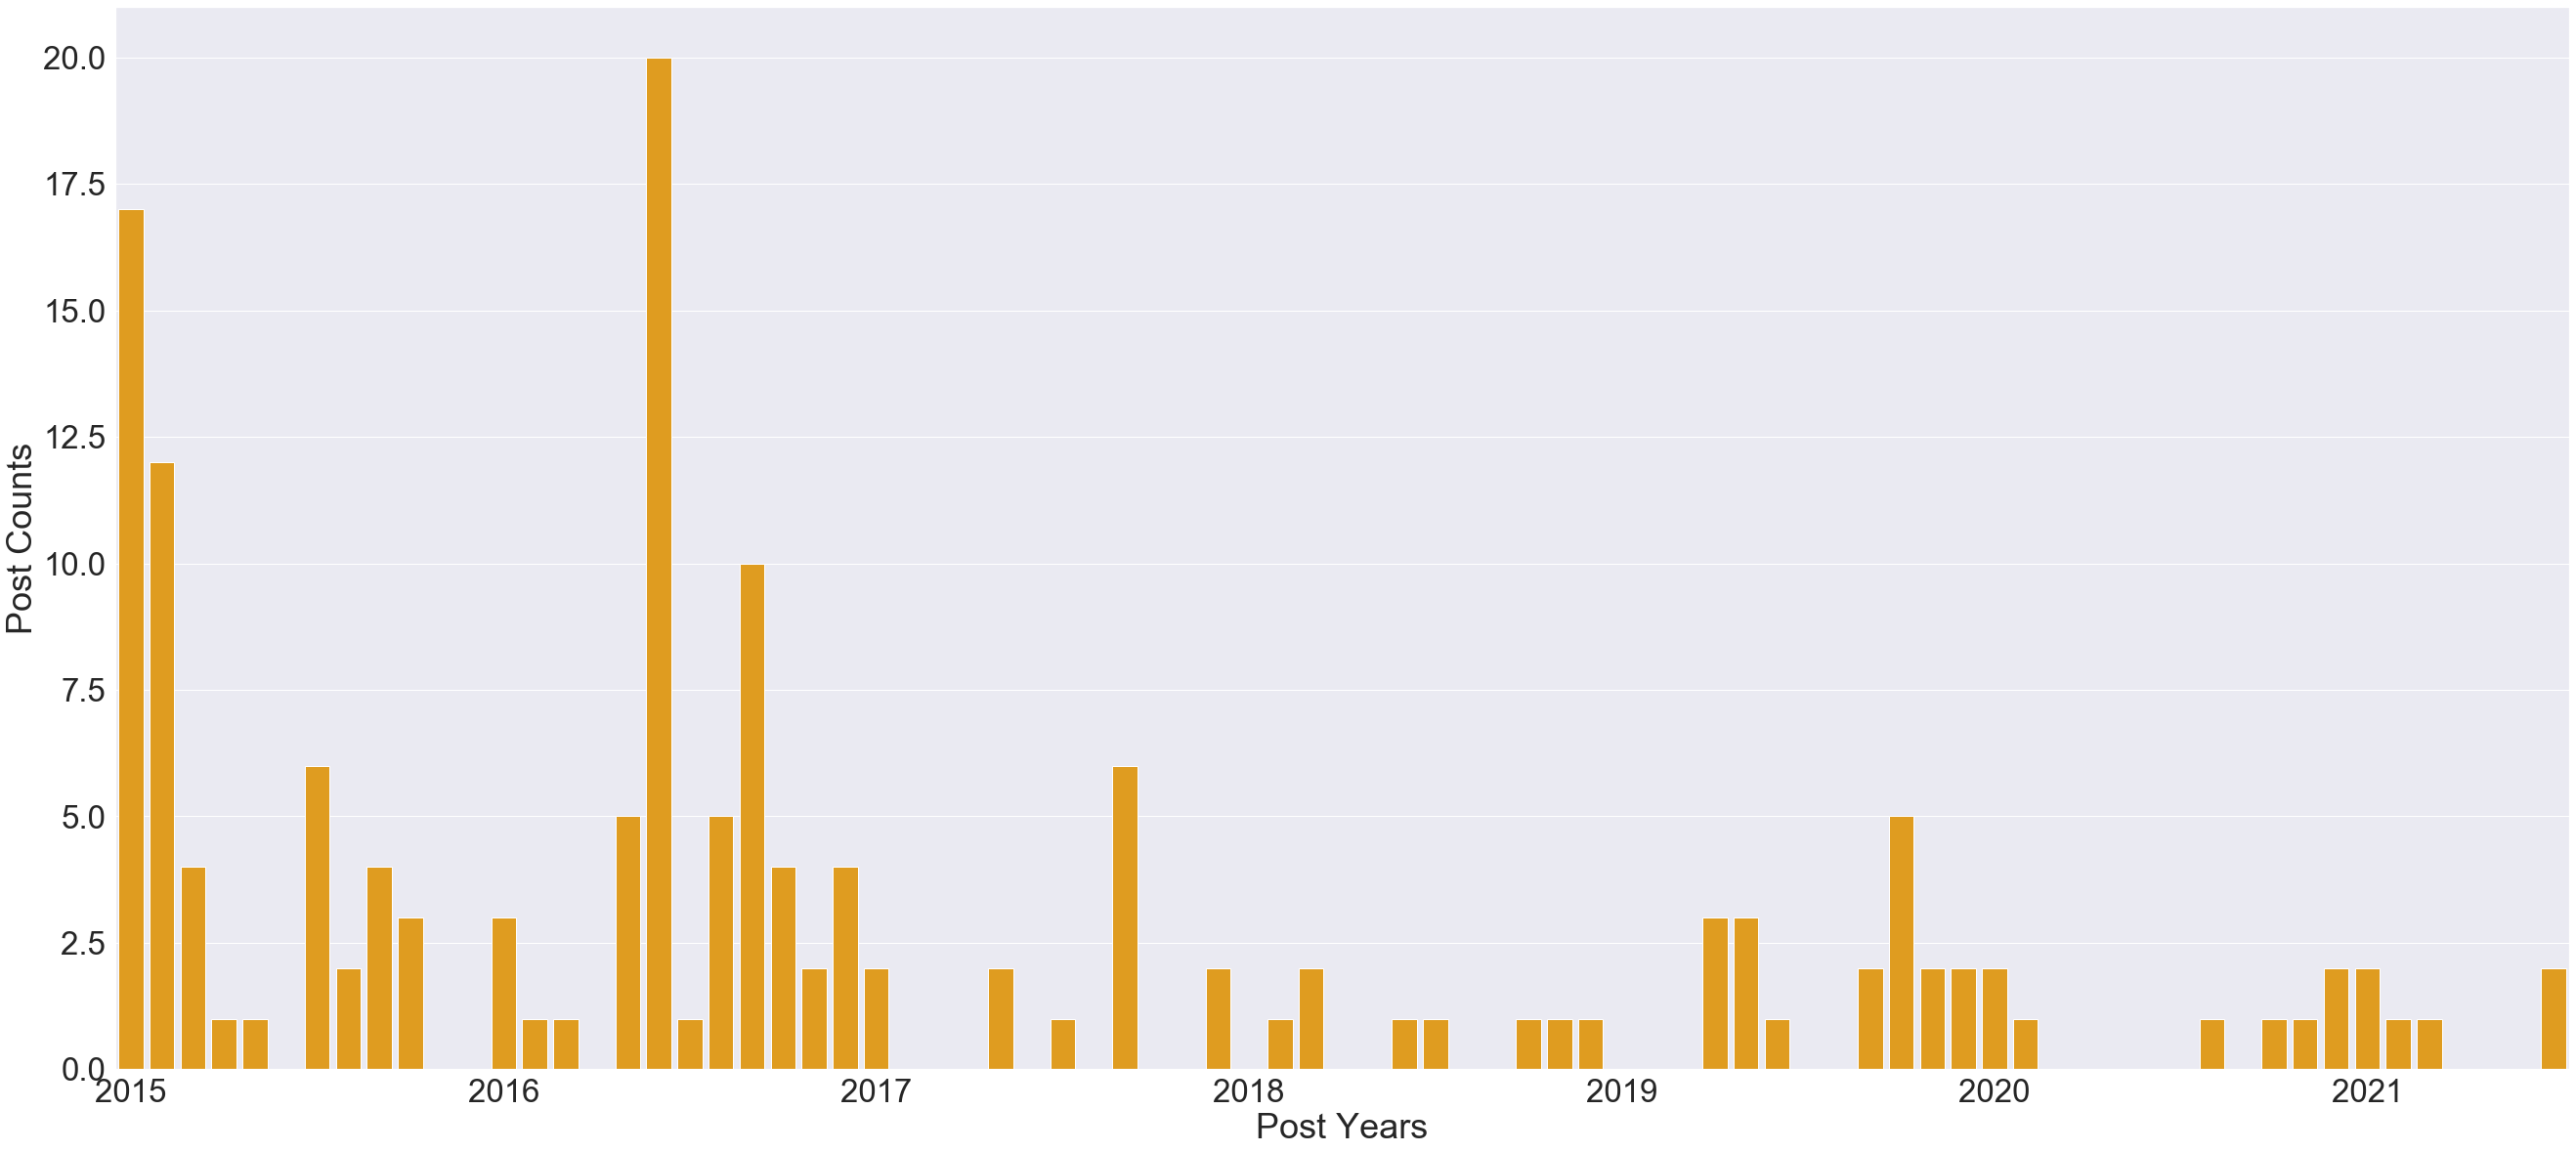

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(45,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

# create bar plot
sns.barplot(x=x_labels, y=post_counts, color="orange")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(0, len(x_labels), step=12)

# reformat date to display year only
plt.ylabel("Post Counts")
plt.xlabel("Post Years")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

The chart above represents my personal Facebook data (from Jan 2015 when I joined - July 2021) — we can see that I posted regularly on Facebook in the early months — I was excited at the time and wanted to show the world. The trend dropped to zero posts around June, but picked up gradually thereafter. 

In June, 2016, I posted the highest number of times and have had irregular posting habits since then. I even stopped posting on Facebook entirely for several periods in all the years. 2016 was the year in which I posted most regularly.

It appears I haven't been posting a lot this year — that'll probably change considering I'm set to be more active as I'll be posting interesting outcomes of my learning/career journey.

In this notebook we've done the following:

- We read a JSON file of my FB data in a pandas DataFrame.
- We broke the data down by month and counted the number of posts per month.
- We visualized my Facebook usage and learned this: *I used to spend more time on Facebook in the early days compared to now.*